In [2]:
import tensorflow as tf

In [180]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [181]:
PATH = os.path.join("/home/thanos/.keras/datasets/", 'faceless')
PATH

'/home/thanos/.keras/datasets/faceless'

In [182]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
train_dir

'/home/thanos/.keras/datasets/faceless/train'

In [183]:
train_cats_dir = os.path.join(train_dir, 'nica/nica2')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'saneh/saneh2')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'nica/nica2')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'saneh/saneh2')  # directory with our validation dog pictures

In [184]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val


In [185]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 125
total training dog images: 259
total validation cat images: 100
total validation dog images: 100
--
Total training images: 384
Total validation images: 200


In [461]:
batch_size = 32
color_mode="rgb"
epochs = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [462]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [463]:
train_image_generator

In [475]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 384 images belonging to 2 classes.


In [474]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 200 images belonging to 2 classes.


In [466]:
sample_training_images, _ = next(val_data_gen)
# sample_training_images

In [467]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(2, 5, figsize=(40,40))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

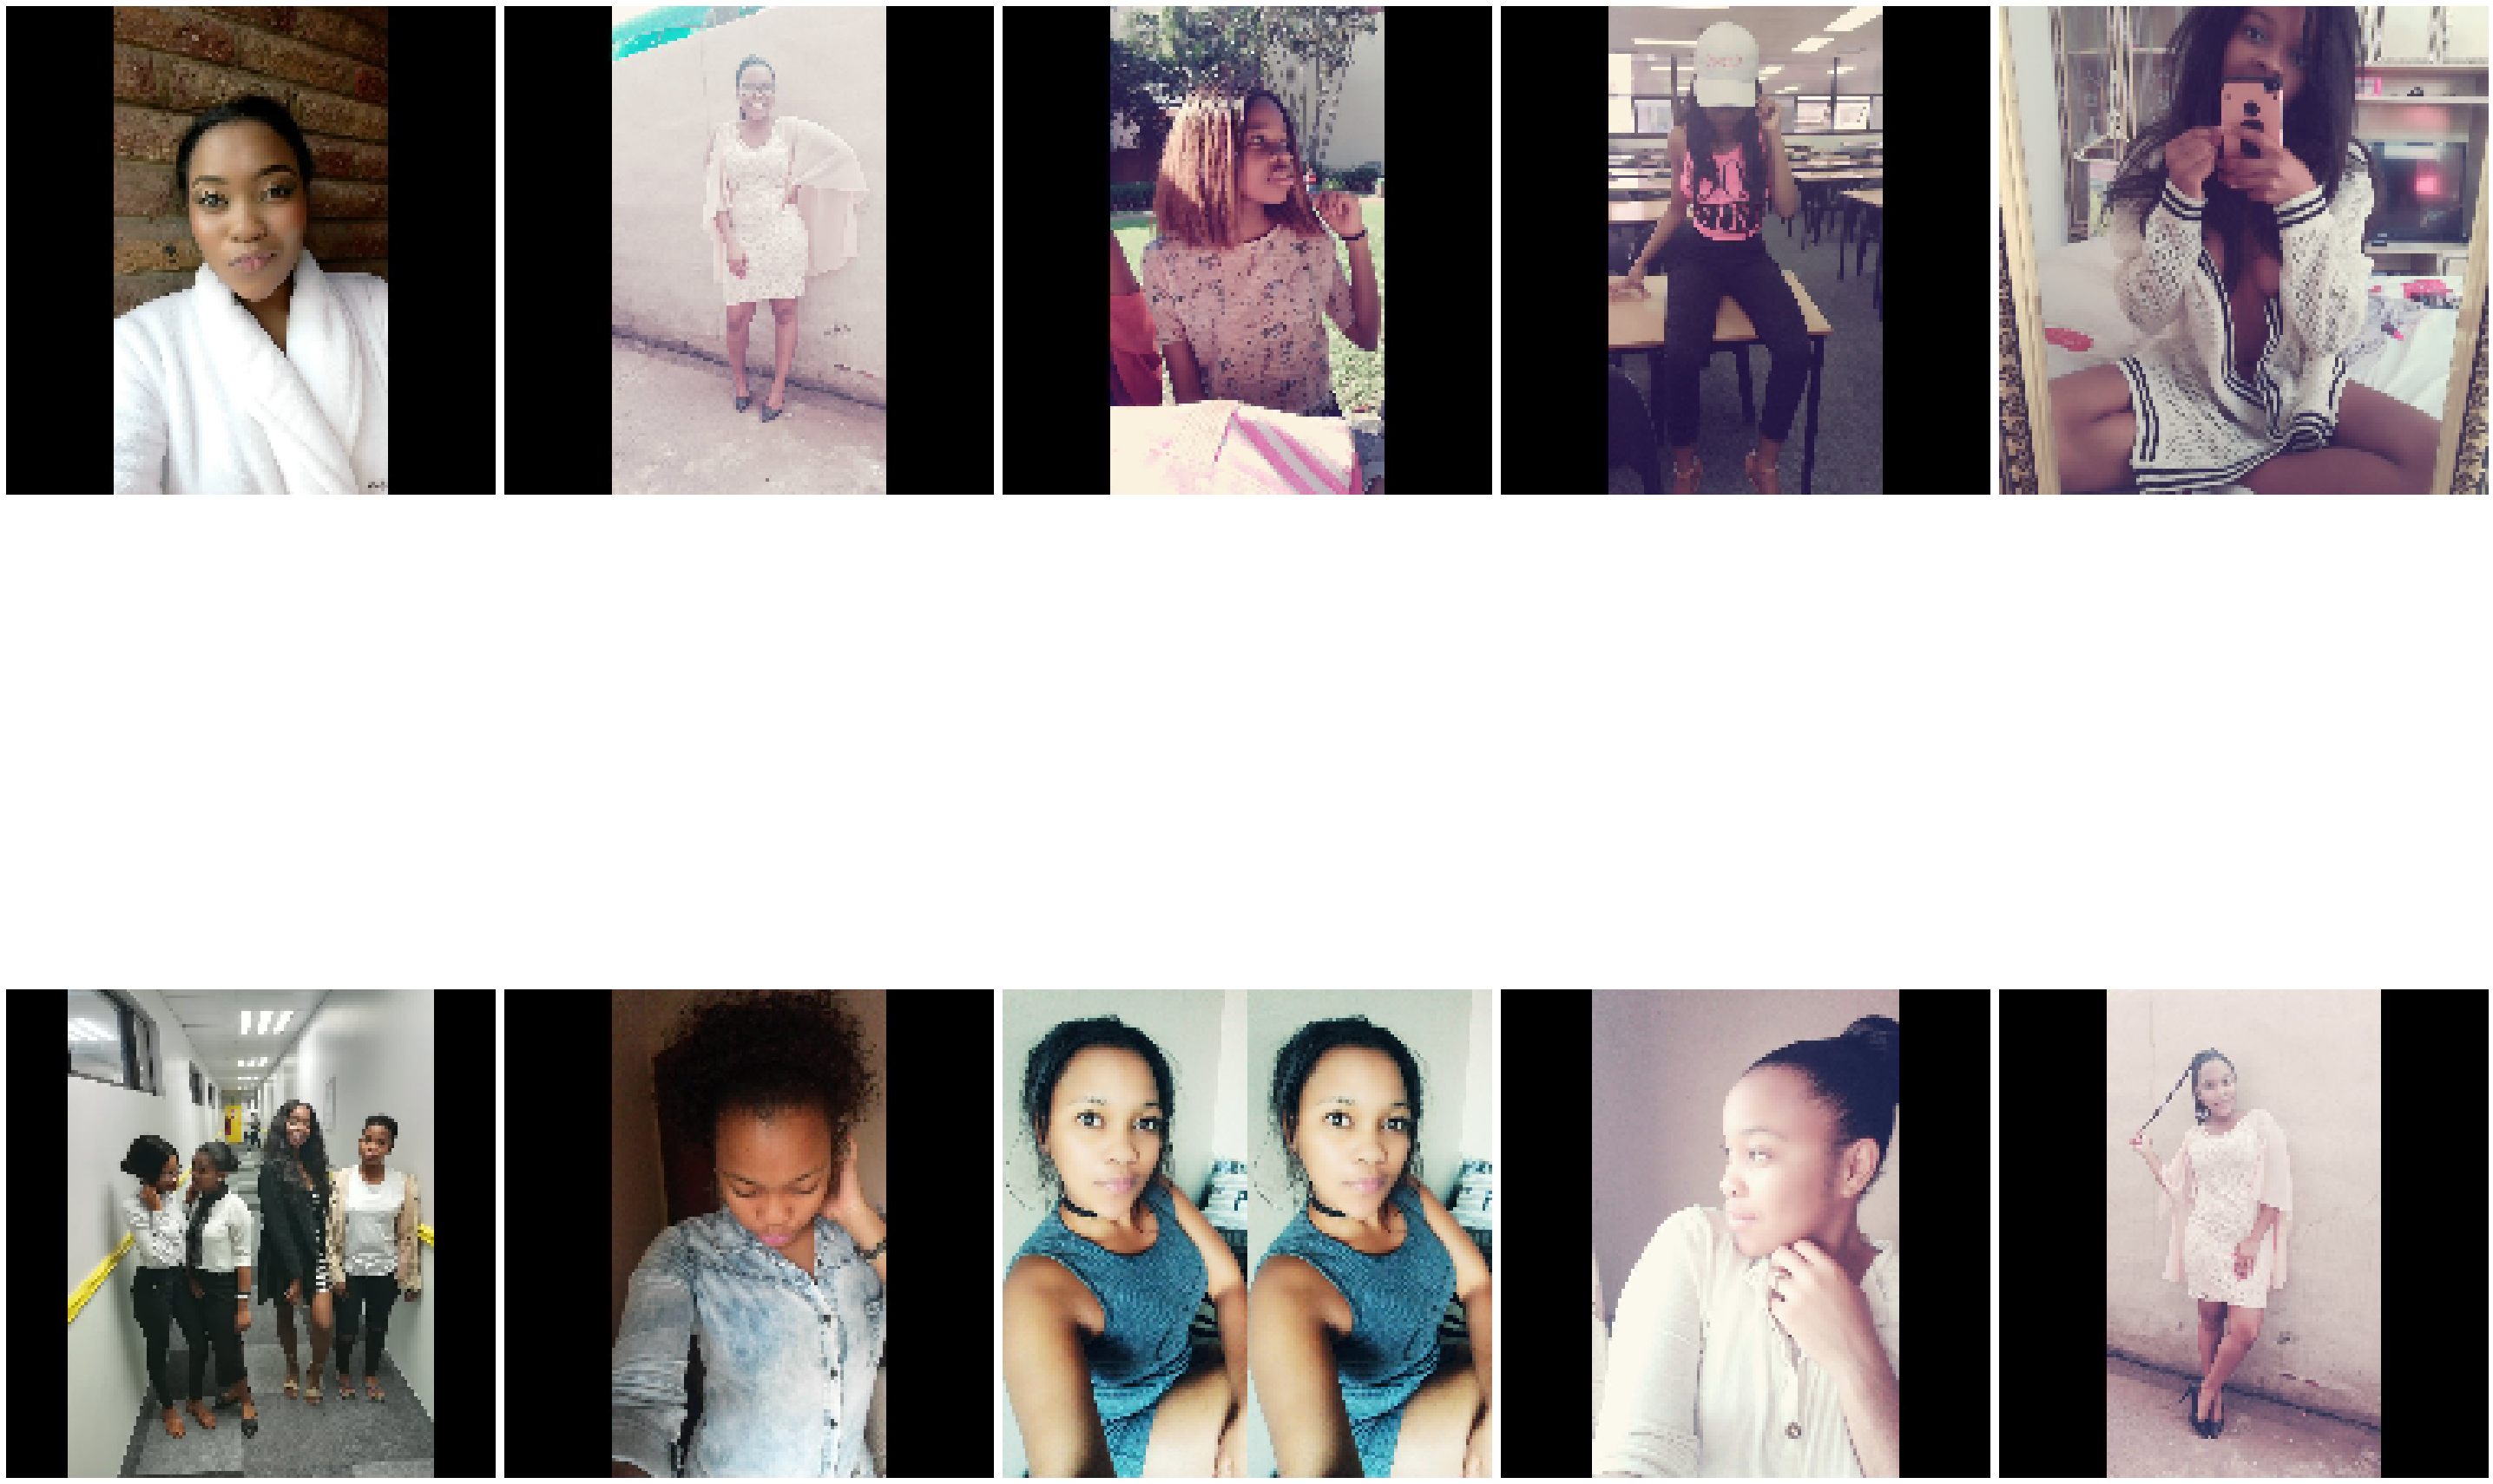

In [468]:
plotImages(sample_training_images[:180])

In [469]:
#  create model 
# model = Sequential([
#     Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
#     MaxPooling2D(),
#     Conv2D(32, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
#     Conv2D(64, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

In [476]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [477]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [472]:
# model.summary()

In [478]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/20
12/12 [==============================] - 43s 4s/step - loss: 0.9119 - acc: 0.6198 - val_loss: 0.7584 - val_acc: 0.4948
Epoch 2/20
12/12 [==============================] - 19s 2s/step - loss: 0.4918 - acc: 0.7734 - val_loss: 0.8008 - val_acc: 0.5260
Epoch 3/20
12/12 [==============================] - 22s 2s/step - loss: 0.4568 - acc: 0.7995 - val_loss: 0.7832 - val_acc: 0.5365
Epoch 4/20
12/12 [==============================] - 21s 2s/step - loss: 0.3324 - acc: 0.8620 - val_loss: 0.7037 - val_acc: 0.6198
Epoch 5/20
12/12 [==============================] - 21s 2s/step - loss: 0.3137 - acc: 0.8724 - val_loss: 0.8497 - val_acc: 0.5729
Epoch 6/20
12/12 [==============================] - 21s 2s/step - loss: 0.2637 - acc: 0.8906 - val_loss: 0.7793 - val_acc: 0.6094
Epoch 7/20
12/12 [==============================] - 19s 2s/step - loss: 0.2195 - acc: 0.9089 - val_loss: 0.8172 - val_acc: 0.6406
Epoch 8/20
12/12 [==============================] - 19s 2s/step - loss: 0.1728 - acc: 0.93

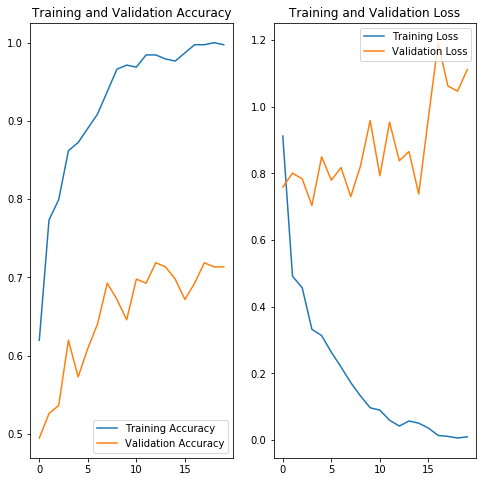

In [479]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [480]:
def num_to_name(number):
    if not predictions[num] > 0.5:
        return 'nica'
    else:
        return 'saneh'

In [483]:
num = 11
predictions = model.predict(sample_training_images, verbose=1)

num_to_name(predictions[num])

32/32 [==============================] - 0s 8ms/sample


'saneh'

In [484]:
# predicted_class_indices=np.argmax(predictions,axis=1)

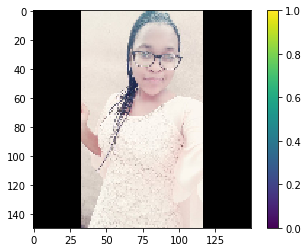

In [485]:
# plotImages(sample_training_images[:num+1])
plt.figure()
plt.imshow(sample_training_images[num])
plt.colorbar()
plt.grid(False)
plt.show()

In [171]:
class_names = ['T-shirt/top', 'Trouser']

In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]